In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA as PCA
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('C:/mini project/BOD in river water/test.csv')

In [6]:
print('shape = ', data.shape)
print(data.columns)

shape =  (63, 8)
Index(['Id', '1', '2', '3', '4', '5', '6', '7'], dtype='object')


In [7]:
data = data.drop(['Id',], axis=1)
data['2'] = data['3'].factorize()[0]
data = data.dropna()
data.head(10)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 13 to 58
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       10 non-null     float64
 1   2       10 non-null     int64  
 2   3       10 non-null     float64
 3   4       10 non-null     float64
 4   5       10 non-null     float64
 5   6       10 non-null     float64
 6   7       10 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 640.0 bytes


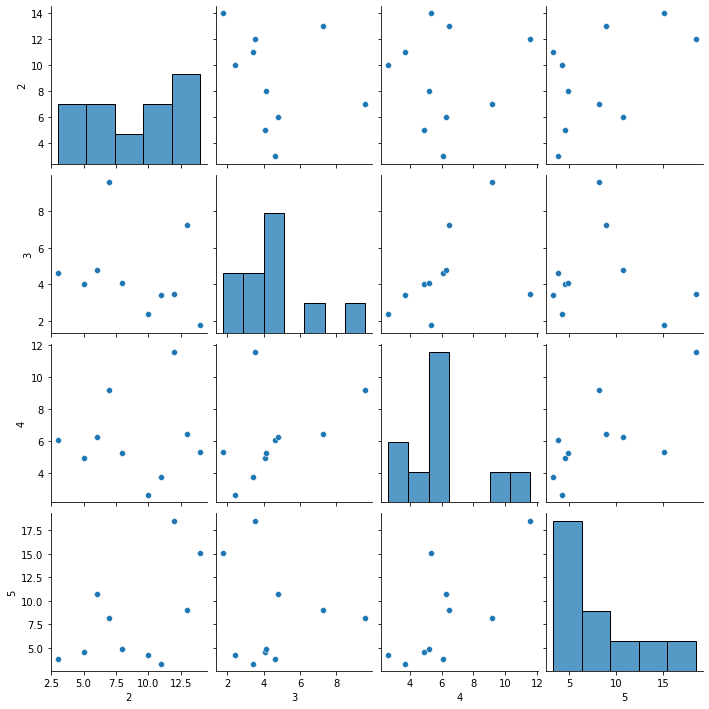

In [8]:
sns.pairplot(data[['2', '3', '4', '5']]);


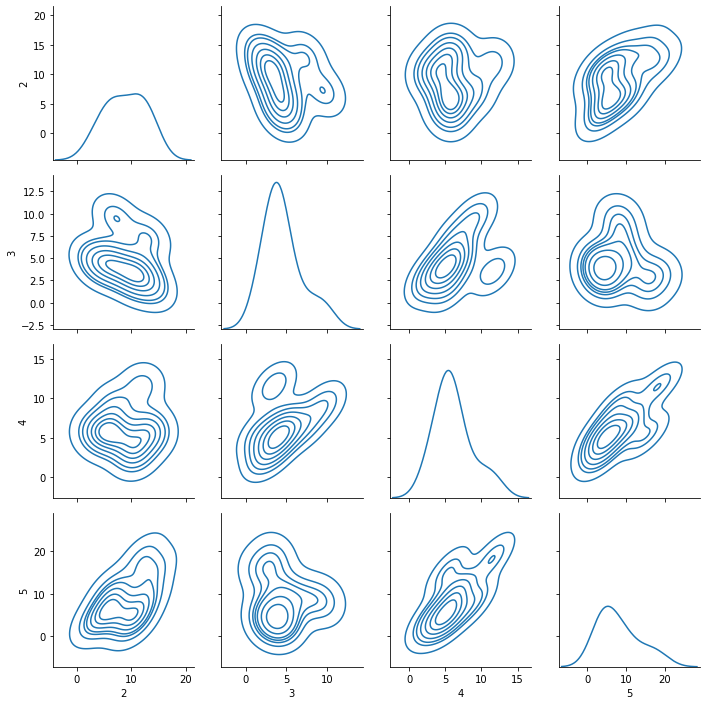

In [9]:
g = sns.PairGrid(data[['2', '3', '4', '5']])
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=8);

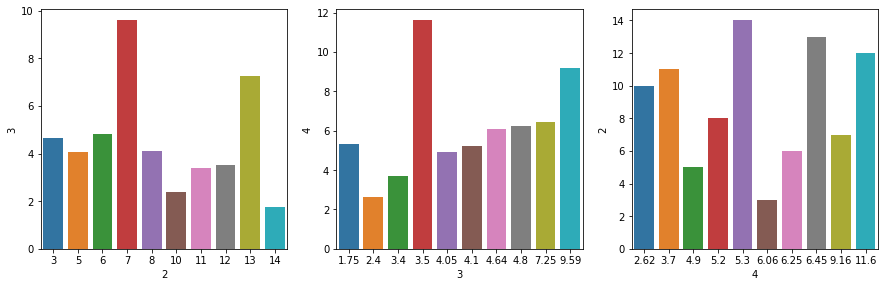

In [10]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3,3,1)
sns.barplot(y='3',x='2', data=data);
ax2 = fig.add_subplot(3,3,2)
sns.barplot(y='4',x='3', data=data);
ax3 = fig.add_subplot(3,3,3)
sns.barplot(y='2',x='4', data=data);

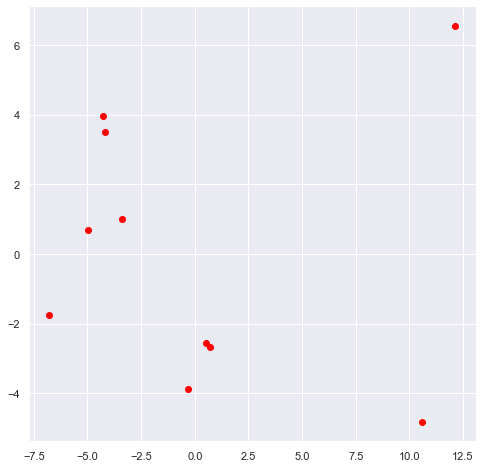

In [11]:
pca = PCA(n_components=2)
pca.fit(data)
Xpca = pca.transform(data)
sns.set()
plt.figure(figsize=(8,8))
plt.scatter(Xpca[:,0],Xpca[:,1], c='Red')
plt.show()

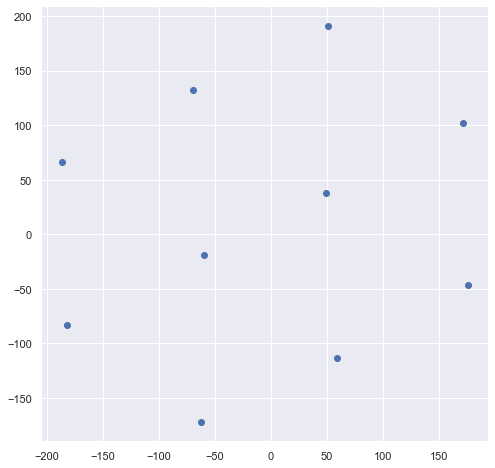

In [12]:
from sklearn.manifold import TSNE
tsn = TSNE()
res_tsne = tsn.fit_transform(data)
plt.figure(figsize=(8,8))
plt.scatter(res_tsne[:,0],res_tsne[:,1]);

In [13]:
from sklearn.cluster import AgglomerativeClustering as AggClus


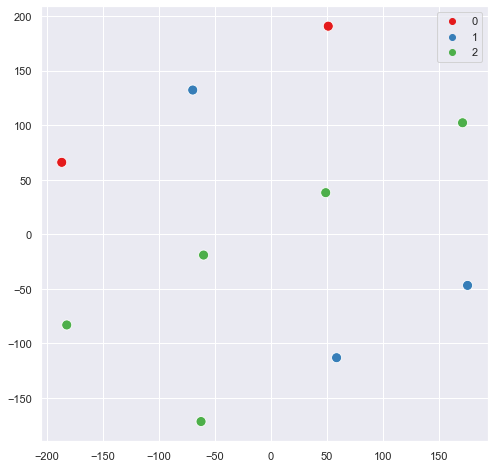

In [14]:
clus_mod = AggClus(n_clusters=3)
assign = clus_mod.fit_predict(data)
plt.figure(figsize=(8,8))
sns.set(style='darkgrid',palette='muted')
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],s=100, hue=assign, palette='Set1');

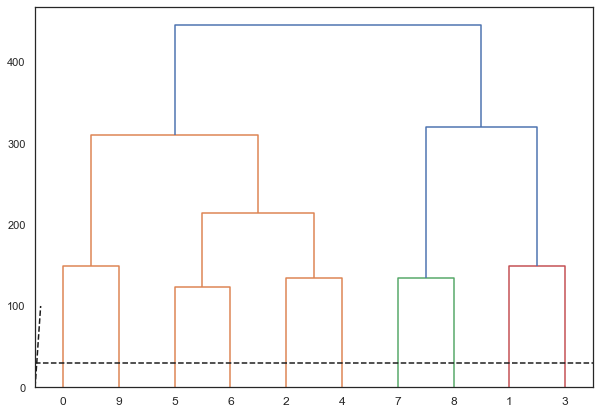

In [15]:
from scipy.cluster.hierarchy import dendrogram, ward
sns.set(style='white')
plt.figure(figsize=(10,7))
link = ward(res_tsne)
dendrogram(link)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [30,30],'--', c='k')
ax.plot(bounds,'--', c='k')
plt.show()

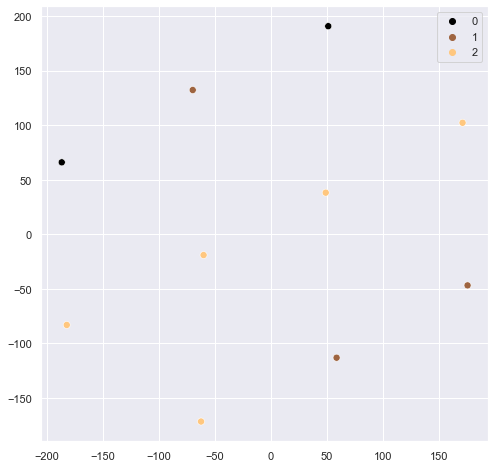

In [16]:
clus_mod = AggClus(n_clusters=3)
assign = clus_mod.fit_predict(data)
plt.figure(figsize=(8,8))
sns.set(style='darkgrid',palette='muted')
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],s=50, hue=assign, palette='copper');